L'objet de ce notebook est de répondre à certaines questions sur le nombre de validations de titres de transport sur le réseau ferré. Le dataset que nous utilisons se trouve ici : https://data.iledefrance-mobilites.fr/explore/dataset/validations-reseau-ferre-nombre-validations-par-jour-1er-semestre/information/

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [74]:
data_validation_path = "./data/validations-reseau-ferre-nombre-validations-par-jour-1er-semestre.csv"

df_validation = pd.read_csv(data_validation_path, sep=";", parse_dates=["JOUR"], dayfirst=False)
df_validation.head()

,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,lda,CATEGORIE_TITRE,NB_VALD
0,2023-01-09,100,110,481,LOUVRE,73630,?,58
1,2023-01-09,100,110,481,LOUVRE,73630,IMAGINE R,1120
2,2023-01-09,100,110,483278,BARBARA,70441,FGT,100
3,2023-01-09,100,110,483280,LUCIE AUBRAC,483315,FGT,85
4,2023-01-09,100,110,483280,LUCIE AUBRAC,483315,TST,169


In [75]:
JOUR = "JOUR"
CODE_STIF_TRNS = "CODE_STIF_TRNS"
CODE_STIF_RES = "CODE_STIF_RES"
CODE_STIF_ARRET = "CODE_STIF_ARRET"
LIBELLE_ARRET = "LIBELLE_ARRET"
ID_REFA_LDA = "ID_REFA_LDA"
CATEGORIE_TITRE = "CATEGORIE_TITRE"
NB_VALD = "NB_VALD"

In [76]:

df_validation = df_validation.drop_duplicates()


In [77]:

df_validation.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096209 entries, 0 to 1096208
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   JOUR             1096209 non-null  datetime64[ns]
 1   CODE_STIF_TRNS   1096209 non-null  int64         
 2   CODE_STIF_RES    1096209 non-null  object        
 3   CODE_STIF_ARRET  1096209 non-null  object        
 4   LIBELLE_ARRET    1096209 non-null  object        
 5   lda              1096209 non-null  int64         
 6   CATEGORIE_TITRE  1096209 non-null  object        
 7   NB_VALD          1096209 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 66.9+ MB


In [78]:
# check unique values per column
unique_vals = {}
for column in df_validation.columns:
    unique_vals[column] = len(df_validation[column].unique())
    print(f"Nombres de valeurs uniques dans la colonne {column} : ", len(df_validation[column].unique()))
df_unique_vals = pd.Series(unique_vals)
# df_unique_vals[[ID_REFA_LDA, LIBELLE_ARRET, CODE_STIF_ARRET]].plot.barh()
# plt.xlabel("Nombre de valeurs uniques")

Nombres de valeurs uniques dans la colonne JOUR :  181
Nombres de valeurs uniques dans la colonne CODE_STIF_TRNS :  3
Nombres de valeurs uniques dans la colonne CODE_STIF_RES :  13
Nombres de valeurs uniques dans la colonne CODE_STIF_ARRET :  756
Nombres de valeurs uniques dans la colonne LIBELLE_ARRET :  747
Nombres de valeurs uniques dans la colonne lda :  726
Nombres de valeurs uniques dans la colonne CATEGORIE_TITRE :  9
Nombres de valeurs uniques dans la colonne NB_VALD :  16101


##### **Note** : Il semble y avoir plus de valeurs dans `LIBELLE_ARRET` (noms de stations) que de `ID_REFA_LDA`. Certains noms de station sont écrits de plusieurs façons. Voir ci-après. 

In [79]:
df_validation[df_validation.LIBELLE_ARRET.str.contains("CLICHY")].LIBELLE_ARRET.unique()

array(['PLACE CLICHY', 'PTE DE CLICHY', 'PORTE-DE-CLICHY',
       'CLICHY LEVALLOI', 'MAIRIE CLICHY', 'CLICHY ST-OUEN'], dtype=object)

##### **Question métier** : Comment gère-t-on les noms tels que `'PORTE-DE-CLICHY'`, `'PTE DE CLICHY'` et `'PORTE DE CLICHY'`?  Sachant que ces stations n'ont pas les mêmes codes ?

In [80]:
clichy = df_validation[df_validation.LIBELLE_ARRET.str.contains("CLICHY")]
# clichy[clichy[ID_REFA_LDA] == 71545].head(10)
clichy.head()

,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,lda,CATEGORIE_TITRE,NB_VALD
110,2023-01-09,100,110,648,PLACE CLICHY,71435,NAVIGO JOUR,50
141,2023-01-09,100,110,689,PTE DE CLICHY,71545,?,601
142,2023-01-09,100,110,689,PTE DE CLICHY,71545,AMETHYSTE,565
432,2023-01-09,800,803,688,PORTE-DE-CLICHY,71545,NAVIGO JOUR,6
721,2023-01-09,800,854,191,CLICHY LEVALLOI,72073,AMETHYSTE,135


# Quelles sont les 20 premières stations en terme de validations ?

In [81]:
df_premiers_arrets_semestre = df_validation[[LIBELLE_ARRET, NB_VALD]].groupby(LIBELLE_ARRET).sum().sort_values(by=NB_VALD, ascending=False)
df_premiers_arrets_semestre = df_premiers_arrets_semestre.reset_index()
df_premiers_arrets_semestre.head(20)


,LIBELLE_ARRET,NB_VALD
0,SAINT-LAZARE,32274900
1,CHATELET,20528277
2,GARE DE LYON,18567245
3,LA DEFENSE,14699981
4,MONTPARNASSE,13491510
5,GARE DE L'EST,13066849
6,GARE DU NORD,12886810
7,REPUBLIQUE,6597870
8,LES HALLES,6588810
9,NATION,5925298


# Proposez une illustration graphique de ce classement ?


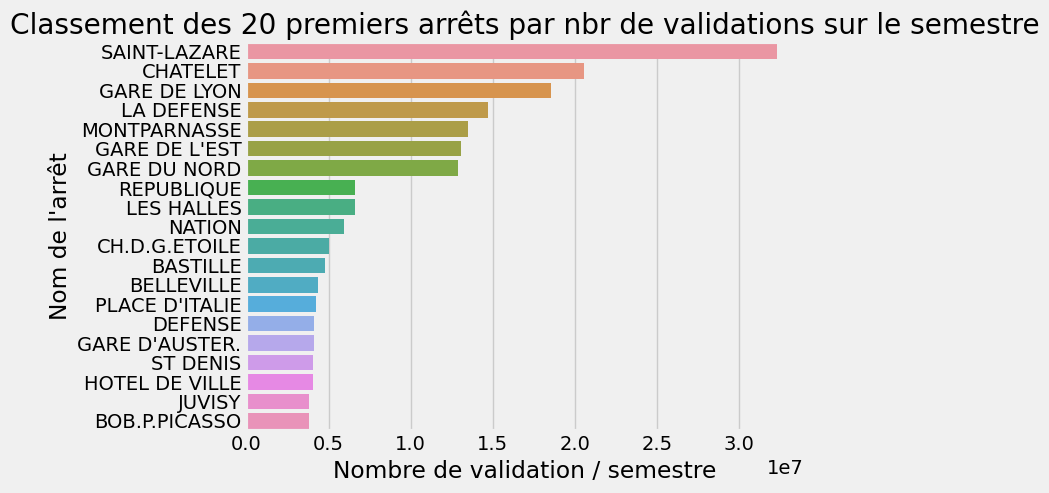

In [82]:
sns.barplot(data=df_premiers_arrets_semestre.head(20),y=LIBELLE_ARRET, x=NB_VALD)
plt.xticks(rotation='vertical')
plt.ylabel("Nom de l'arrêt")
plt.xlabel("Nombre de validation / semestre")
plt.title("Classement des 20 premiers arrêts par nbr de validations sur le semestre")
plt.xticks(rotation=0)
plt.show()

# Proposez une classification des arrêts en vous basant uniquement sur le nombre de validations par titre de transport ?

In [83]:
df_classement_titre =  df_validation[[LIBELLE_ARRET, NB_VALD, CATEGORIE_TITRE]].groupby([LIBELLE_ARRET,CATEGORIE_TITRE]).sum().sort_values(by=[NB_VALD], ascending=False).reset_index()
df_classement_titre.head(20)

,LIBELLE_ARRET,CATEGORIE_TITRE,NB_VALD
0,SAINT-LAZARE,NAVIGO,20232100
1,CHATELET,NAVIGO,10711511
2,GARE DE LYON,NAVIGO,10624213
3,LA DEFENSE,NAVIGO,9236724
4,GARE DE L'EST,NAVIGO,7684888
5,MONTPARNASSE,NAVIGO,7398488
6,GARE DU NORD,NAVIGO,6705055
7,SAINT-LAZARE,IMAGINE R,5969770
8,CHATELET,IMAGINE R,5376709
9,LES HALLES,NAVIGO,3605932


# Quelles prédictions pouvez-vous faire pour le nombre de validations dans les stations OLYMPIADES et MONTROUGE sur la période du 24 au 30 juin et les comparer par rapport à la réalité ?


### Approche : Soit on construit un modèle pour chaque station, soit on construit un modèle pour les deux stations. On va d'abord partir avec un modèle pour chaque station. La démarche s'appliquera à un plus grand dataset.

In [84]:
# create constants for convenience, especially since we have a space in 'M. MONTROUGE'
OLYMPIADES = "OLYMPIADES"
MONTROUGE = "M. MONTROUGE"

In [85]:
used_columns = [JOUR, LIBELLE_ARRET, NB_VALD, CATEGORIE_TITRE]

def select_station(df: pd.DataFrame, nom_station: str) -> pd.DataFrame:
    validation_station = df[df[LIBELLE_ARRET].str.lower().str.contains(nom_station.lower())]
    validation_station = validation_station[used_columns]
    validation_station = validation_station.sort_values(by=JOUR).reset_index(drop=True)
    validation_station = validation_station.astype({NB_VALD: float})
    return validation_station

validation_olympiades = select_station(df=df_validation, nom_station=OLYMPIADES)
validation_montrouge = select_station(df=df_validation, nom_station=MONTROUGE)


In [86]:
validation_olympiades.head()



,JOUR,LIBELLE_ARRET,NB_VALD,CATEGORIE_TITRE
0,2023-01-01,OLYMPIADES,114.0,NON DEFINI
1,2023-01-01,OLYMPIADES,313.0,TST
2,2023-01-01,OLYMPIADES,197.0,AMETHYSTE
3,2023-01-01,OLYMPIADES,1653.0,NAVIGO
4,2023-01-01,OLYMPIADES,157.0,FGT


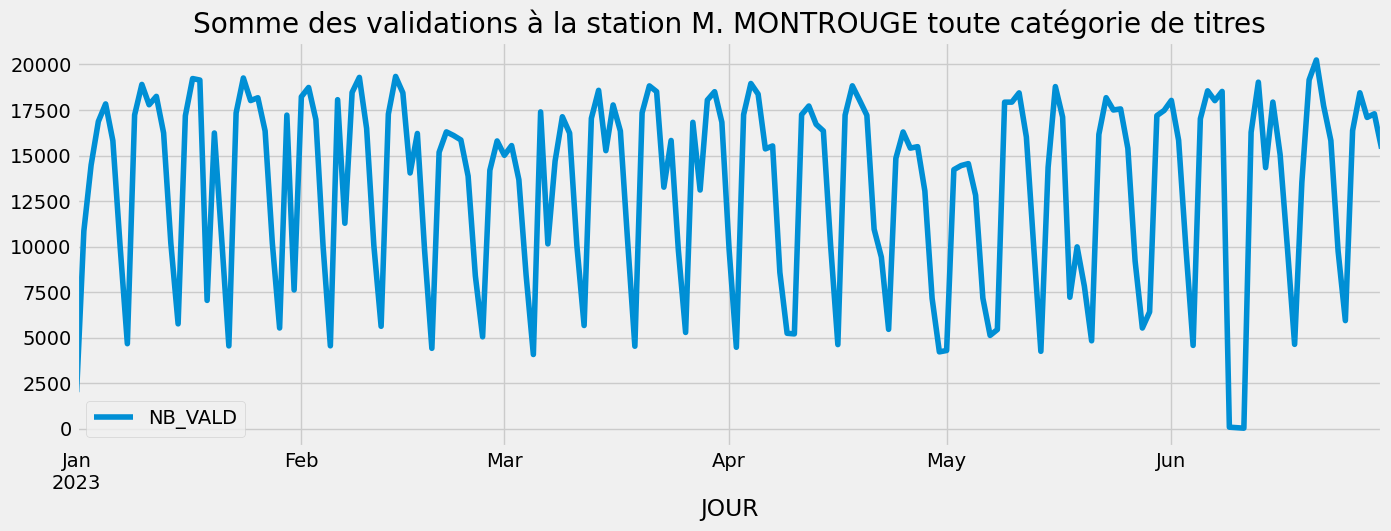

In [87]:
# visualisation de la somme des validations à Montrouge par exemple
def plot_titre_par_jour(station: str) -> None:
    df_station = select_station(df=df_validation, nom_station=station)

    df_station_jour = df_station[[NB_VALD, JOUR]].groupby(JOUR).sum().reset_index()
    fig, ax = plt.subplots(figsize=(15, 5))
    df_station_jour[[JOUR, NB_VALD]].set_index(JOUR).plot(
        ax=ax,
        title=f"Somme des validations à la station {station} toute catégorie de titres")
    plt.show()
    #df_station_jour

plot_titre_par_jour(station=MONTROUGE)

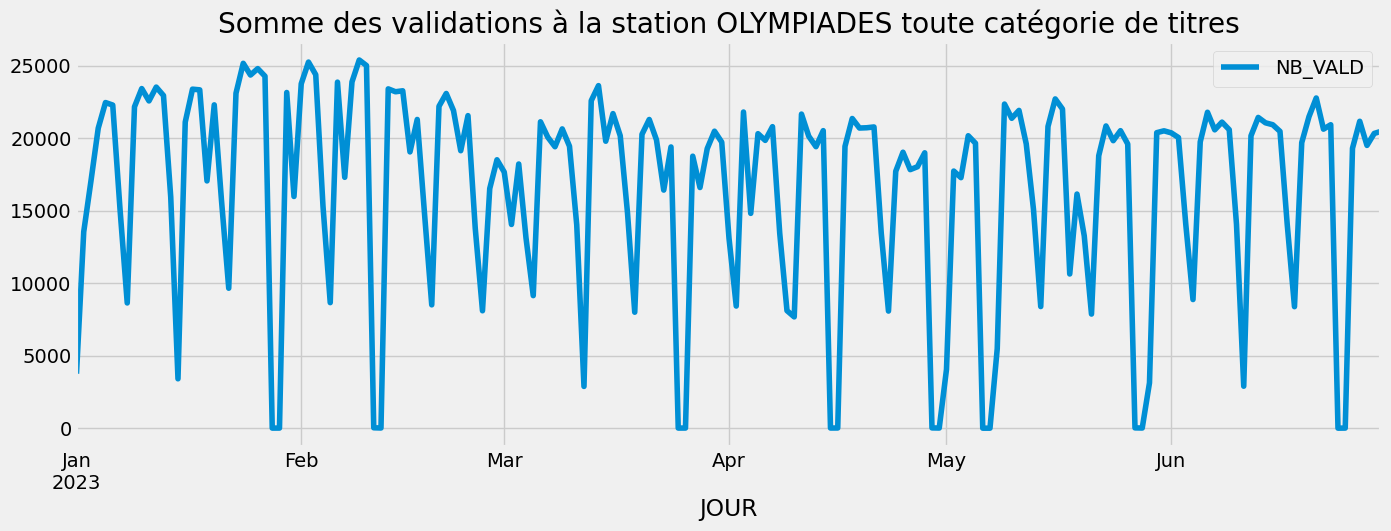

In [88]:
plot_titre_par_jour(station=OLYMPIADES)

In [89]:
def days_min_vald(df: pd.DataFrame, station: str, threshold: float = 5000) -> pd.Series:
    validation_station = select_station(df = df, nom_station=station)
    somme_titres_valides = validation_station[[JOUR, NB_VALD]].groupby(JOUR).sum().sort_values(NB_VALD)
    # jours avec le moins de titre validé
    return somme_titres_valides[somme_titres_valides.NB_VALD <= threshold].reset_index().JOUR.dt.day_name().value_counts()


In [90]:
days_min_vald(df=df_validation, station=MONTROUGE)

JOUR
Sunday      15
Saturday     1
Friday       1
Monday       1
Name: count, dtype: int64

In [91]:
days_min_vald(df=df_validation, station=OLYMPIADES)

JOUR
Sunday      12
Saturday     8
Monday       2
Name: count, dtype: int64

Les jours les moins fréquentés sont généralement le Dimanche pour les deux stations. 

## Feature Engineering

In [92]:

def feature_engineering(df: pd.DataFrame) -> pd.DataFrame:
    copy_df = df.copy()
    # changing '?' to INCONNU
    copy_df[CATEGORIE_TITRE] = copy_df[CATEGORIE_TITRE].replace("?", "INCONNU")
    copy_df["jour_de_la_semaine"] = copy_df[JOUR].dt.day_of_week
    copy_df["mois"] = copy_df[JOUR].dt.month
    copy_df["numero_jour"] = copy_df[JOUR].dt.day
    columns_to_encode = [CATEGORIE_TITRE]
    df_encoded = pd.get_dummies(copy_df, columns=columns_to_encode, prefix_sep="_", drop_first=True, dtype=int)
    df_encoded = df_encoded.astype({NB_VALD: float})
    del copy_df
    return df_encoded


In [93]:
    
    
montrouge_engineer = feature_engineering(df=validation_montrouge)
olympiades_engineer = feature_engineering(df=validation_olympiades)


In [94]:

date_to_split = pd.to_datetime("2023-06-01")
def split_data(df: pd.DataFrame, date_to_split=date_to_split) -> tuple:
    """
    Splits the dataframe into train and test set. 
    train set consists of records before date_to_spit
    while the test consist of the remaining records.
    """
    train = df[df.JOUR < date_to_split]
    test = df[df.JOUR >= date_to_split]
    return train, test

In [95]:
df_validation.JOUR.describe()

count                          1096209
mean     2023-04-01 06:45:46.125237504
min                2023-01-01 00:00:00
25%                2023-02-15 00:00:00
50%                2023-04-02 00:00:00
75%                2023-05-17 00:00:00
max                2023-06-30 00:00:00
Name: JOUR, dtype: object

In [96]:
montrouge_train, montrouge_test = split_data(df=montrouge_engineer)
olympiades_train, olympiades_test = split_data(df=olympiades_engineer)


In [97]:
olympiades_test.head()

,JOUR,LIBELLE_ARRET,NB_VALD,jour_de_la_semaine,mois,numero_jour,CATEGORIE_TITRE_AUTRE TITRE,CATEGORIE_TITRE_FGT,CATEGORIE_TITRE_IMAGINE R,CATEGORIE_TITRE_INCONNU,CATEGORIE_TITRE_NAVIGO,CATEGORIE_TITRE_NAVIGO JOUR,CATEGORIE_TITRE_NON DEFINI,CATEGORIE_TITRE_TST
1266,2023-06-01,OLYMPIADES,1072.0,3,6,1,0,0,0,0,0,0,0,1
1267,2023-06-01,OLYMPIADES,46.0,3,6,1,0,0,0,0,0,1,0,0
1268,2023-06-01,OLYMPIADES,681.0,3,6,1,0,0,0,0,0,0,0,0
1269,2023-06-01,OLYMPIADES,478.0,3,6,1,0,0,0,0,0,0,1,0
1270,2023-06-01,OLYMPIADES,11762.0,3,6,1,0,0,0,0,1,0,0,0


In [98]:
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

### Display the split of the dataset Montrouge

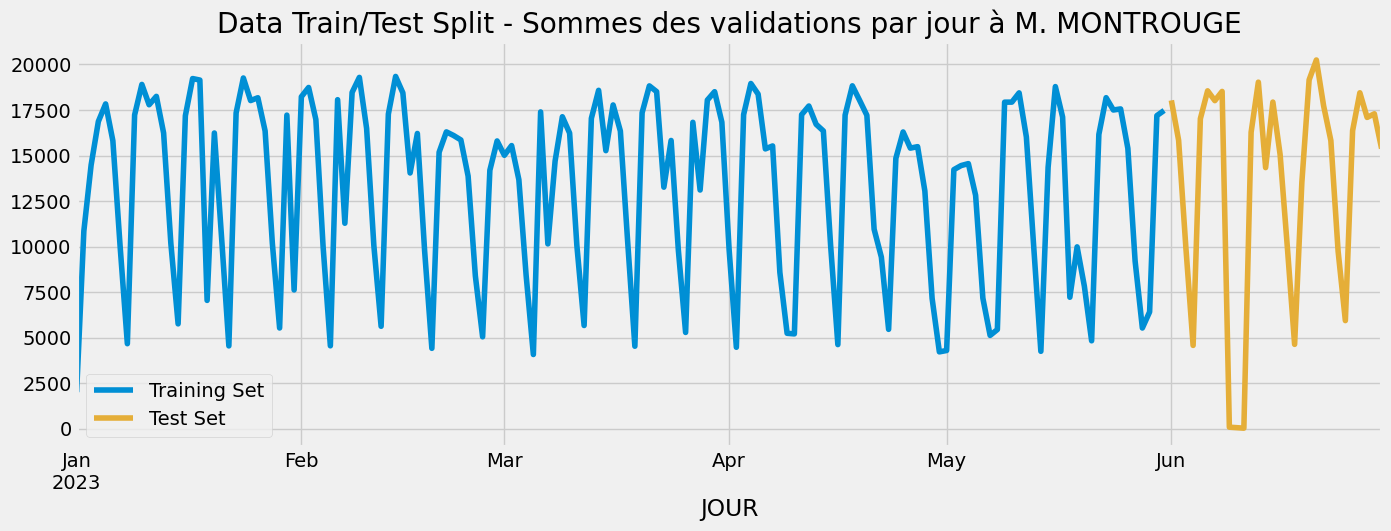

In [99]:

fig, ax = plt.subplots(figsize=(15, 5))
montrouge_train[[JOUR, NB_VALD]].groupby(JOUR).sum().reset_index().set_index(JOUR).plot(
    ax=ax,
    label='Training Set',
    title=f'Data Train/Test Split - Sommes des validations par jour à {MONTROUGE}',
    color=color_pal[0])
montrouge_test[[JOUR, NB_VALD]].groupby(JOUR).sum().reset_index().set_index(JOUR).plot(
    ax=ax,
    label='Test Set',
    color=color_pal[2])
ax.axvline('2022-06-15', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

#### Build ML Model with XG Boost


In [60]:
features = montrouge_engineer.drop([JOUR, NB_VALD, LIBELLE_ARRET], axis=1).columns
target = NB_VALD
def select_features_target_train_test(df: pd.DataFrame, station: str, features: list = features, target: str = target) -> tuple:
    df_engineered = feature_engineering(select_station(df=df, nom_station=station))
    train, test = split_data(df=df_engineered)
    X_train = train[features]
    y_train = train[target]

    X_test = test[features]
    y_test = test[target]
    return X_train, X_test, y_train, y_test



In [100]:
X_train, X_test, _, _ = select_features_target_train_test(df=df_validation,station=OLYMPIADES)

In [108]:
X_train.sample(1).to_dict()

{'jour_de_la_semaine': {1210: 2},
 'mois': {1210: 5},
 'numero_jour': {1210: 24},
 'CATEGORIE_TITRE_AUTRE TITRE': {1210: 0},
 'CATEGORIE_TITRE_FGT': {1210: 0},
 'CATEGORIE_TITRE_IMAGINE R': {1210: 1},
 'CATEGORIE_TITRE_INCONNU': {1210: 0},
 'CATEGORIE_TITRE_NAVIGO': {1210: 0},
 'CATEGORIE_TITRE_NAVIGO JOUR': {1210: 0},
 'CATEGORIE_TITRE_NON DEFINI': {1210: 0},
 'CATEGORIE_TITRE_TST': {1210: 0}}

In [107]:
model_olympiades.predict(np.array([[ 3,  4, 13,  0,  0,  0,  0,  0,  1,  0,  0]]))

array([139.86693], dtype=float32)

#### Create Model

In [50]:
import os
path_models_store = "./saved_models/"
if not os.path.exists(path_models_store):
    os.mkdir(path_models_store)



In [63]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import pickle

def find_boosting_model(station: str):
    # get train and test sets
    X_train, X_test, y_train, y_test = select_features_target_train_test(df=df_validation, station=station)
    print(X_train.columns)
    # create search space for the hyperparameters
    param_grid = {
        'learning_rate': [0.01, 0.1, 0.5],
        'max_depth': [3, 5, 7, 10],
        'n_estimators': [20, 50, 100, 200, 1000],
    }

    model = XGBRegressor(objective='reg:squarederror')
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=False)

    grid_search.fit(X_train, y_train)
    
    best_params = grid_search.best_params_
    best_model = XGBRegressor(objective='reg:squarederror', **best_params)
    best_model.fit(X_train, y_train)
    # saving the trained_model to models_store
    station_renamed = station.replace(" ", "_")
    path_best_model = os.path.join(path_models_store, f"trained_model_{station_renamed}.pickle")
    with open(path_best_model, 'wb') as f:
        pickle.dump(best_model, f)
        print(f"Modèle sauvegardé sous: {path_best_model}")
        print()
        
    y_pred = best_model.predict(X_test)
    y_train_pred = best_model.predict(X_train)
    r2_test = r2_score(y_true=y_test, y_pred=y_pred)
    r2_train = r2_score(y_true=y_train, y_pred=y_train_pred)
    mse_test = mean_squared_error(y_true=y_test, y_pred=y_pred)
    mse_train = mean_squared_error(y_true=y_train, y_pred=y_train_pred)
    mae_test = mean_absolute_error(y_true=y_test, y_pred=y_pred)
    mae_train = mean_absolute_error(y_true=y_train, y_pred=y_train_pred)
    print("best parameters: ", best_params)
    print()
    print("Metriques sur les données de test...")
    print()
    print("MAE test: ", mae_test)
    print("RMSE test: ", np.sqrt(mse_test))
    print("R2 test:", r2_test)
    print()
    print("Métriques sur les données d'entrainement ...")
    print()
    print("MAE train: ", mae_train)
    print("RMSE train: ", np.sqrt(mse_train))
    print("R2 train:", r2_train)


    return best_model


### Entrainement des modèles (peut prendre du temps)

`WARNING`: Pour simplifier le notebook on a sauvegardé chaque modèle dans un fichier .pickle. On peut réentrainer les modèles en exécutant les codes commentés.

In [64]:
# WARNING: Décommenter seulement la ligne ci-après pour réentrainer le model au besoin en faisant un gridsearch
model_olympiades = find_boosting_model(station=OLYMPIADES)


# WARNING: Décommenter tout le bloc suivant pour utiliser les hyper-paramètres
# best_params_olympiades = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
# X_train_olympiades, _, y_train_olympiades, _ = select_features_target_train_test(df=df_validation, station=OLYMPIADES)
# model_olympiades = XGBRegressor(objective='reg:squarederror', **best_params_olympiades)
# model_olympiades.fit(X_train_olympiades, y_train_olympiades)
path_saved_model_olympiades = "./saved_models/trained_model_OLYMPIADES.pickle"
with open(path_saved_model_olympiades, "rb") as f:
    model_olympiades = pickle.load(f)


Index(['jour_de_la_semaine', 'mois', 'numero_jour',
       'CATEGORIE_TITRE_AUTRE TITRE', 'CATEGORIE_TITRE_FGT',
       'CATEGORIE_TITRE_IMAGINE R', 'CATEGORIE_TITRE_INCONNU',
       'CATEGORIE_TITRE_NAVIGO', 'CATEGORIE_TITRE_NAVIGO JOUR',
       'CATEGORIE_TITRE_NON DEFINI', 'CATEGORIE_TITRE_TST'],
      dtype='object')
Modèle sauvegardé sous: ./saved_models/trained_model_OLYMPIADES.pickle

best parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

Metriques sur les données de test...

MAE test:  327.78481012232163
RMSE test:  668.2809009569215
R2 test: 0.9578508091383542

Métriques sur les données d'entrainement ...

MAE train:  334.2882217564289
RMSE train:  732.8885889037334
R2 train: 0.9453973347748603


### Meilleurs paramètres et métriques pour OLYMPIADES:
best parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

Metriques sur les données de test...

- MAE test:  252.6039336654875
- RMSE test:  378.32265649702606
- R2 test: 0.9850855623508684


Métriques sur les données d'entrainement ...

- MAE train:  267.3350163032712
- RMSE train:  529.6954946875661
- R2 train: 0.9688833877118496

**Note:** Comme on le voit il y a un overfit. On peut régler le problème en faisant du monitoring pour stopper l'entrainement.

In [65]:
# WRNING : Décommenter seulement la ligne ci-après pour réentrainer le model au besoin en faisant un gridsearch
model_montrouge = find_boosting_model(station=MONTROUGE)

# WARNING : Décommenter tout le bloc suivant pour utiliser les hyper-paramètres
# best_params_montrouge = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
# X_train_montrouge, _, y_train_montrouge, _ = select_features_target_train_test(df=df_validation, station=MONTROUGE)
# model_montrouge = XGBRegressor(objective='reg:squarederror', **best_params_montrouge)
# model_montrouge.fit(X_train_montrouge, y_train_montrouge)

path_saved_model_montrouge = "./saved_models/trained_model_M._MONTROUGE.pickle"
with open(path_saved_model_montrouge, "rb") as f:
    model_montrouge = pickle.load(f)

Index(['jour_de_la_semaine', 'mois', 'numero_jour',
       'CATEGORIE_TITRE_AUTRE TITRE', 'CATEGORIE_TITRE_FGT',
       'CATEGORIE_TITRE_IMAGINE R', 'CATEGORIE_TITRE_INCONNU',
       'CATEGORIE_TITRE_NAVIGO', 'CATEGORIE_TITRE_NAVIGO JOUR',
       'CATEGORIE_TITRE_NON DEFINI', 'CATEGORIE_TITRE_TST'],
      dtype='object')
Modèle sauvegardé sous: ./saved_models/trained_model_M._MONTROUGE.pickle

best parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

Metriques sur les données de test...

MAE test:  372.46940144625574
RMSE test:  903.1086821999177
R2 test: 0.9024048219481446

Métriques sur les données d'entrainement ...

MAE train:  242.311334049421
RMSE train:  559.9165731138202
R2 train: 0.9559119808733385


### Meilleurs paramètres et métriques pour Montrouge :

best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

Metriques sur les données de test...

- MAE test:  244.69752953284316
- RMSE test:  455.6192018836307
- R2 test: 0.9746433885922264

Métriques sur les données d'entrainement ...

- MAE train:  149.49895936713637
- RMSE train:  370.885644651597
- R2 train: 0.9764707914220265


**Il y a également un overfit**

#### Comparaison entre la prédiction et la réalité

In [66]:
def error_pred_real(model, station: str):
    df_engineered = feature_engineering(select_station(df=df_validation, nom_station=station))
    _, df_engineered_test = split_data(df=df_engineered)
    _, X_test, _, y_test = select_features_target_train_test(df=df_validation, station=station)
    y_pred = model.predict(X_test)
    df_error = pd.DataFrame({
        f"{NB_VALD}_true": y_test,
        f"{NB_VALD}_pred": y_pred,
        "absolute_error": np.abs(y_test - y_pred)})
    df_error[JOUR] = df_engineered_test.JOUR
    return df_error


In [67]:
error_olympiades =  error_pred_real(model=model_olympiades, station=OLYMPIADES)
error_olympiades.head()

,NB_VALD_true,NB_VALD_pred,absolute_error,JOUR
1266,1072.0,914.184692,157.815308,2023-06-01
1267,46.0,112.868866,66.868866,2023-06-01
1268,681.0,571.200928,109.799072,2023-06-01
1269,478.0,489.116302,11.116302,2023-06-01
1270,11762.0,8735.108398,3026.891602,2023-06-01


In [68]:
def plot_error(station: str, model=None, date_to_split=date_to_split):
    if station == OLYMPIADES:
        model = model_olympiades
    elif station == MONTROUGE:
        model = model_montrouge
    else:
        print(fr"""Create and save the model first with the following command `model_{station} = find_boosting_model(station="{station}")`""")
        print("The training might take a while")
        print(fr"""Then call this function with the command `plot_error(station={station}, model=model_{station})`""")
        model = None
    if model:
        df_error_station = error_pred_real(model=model, station=station)
        fig, ax = plt.subplots(figsize=(15, 5))
        df_error_station.drop("absolute_error", axis=1).groupby(JOUR).sum().reset_index().set_index(JOUR).plot(ax=ax,
        style='-', 
        title=f"Sommes des validations à la station {station} à partir du {date_to_split.date()}"
        )
        plt.show()


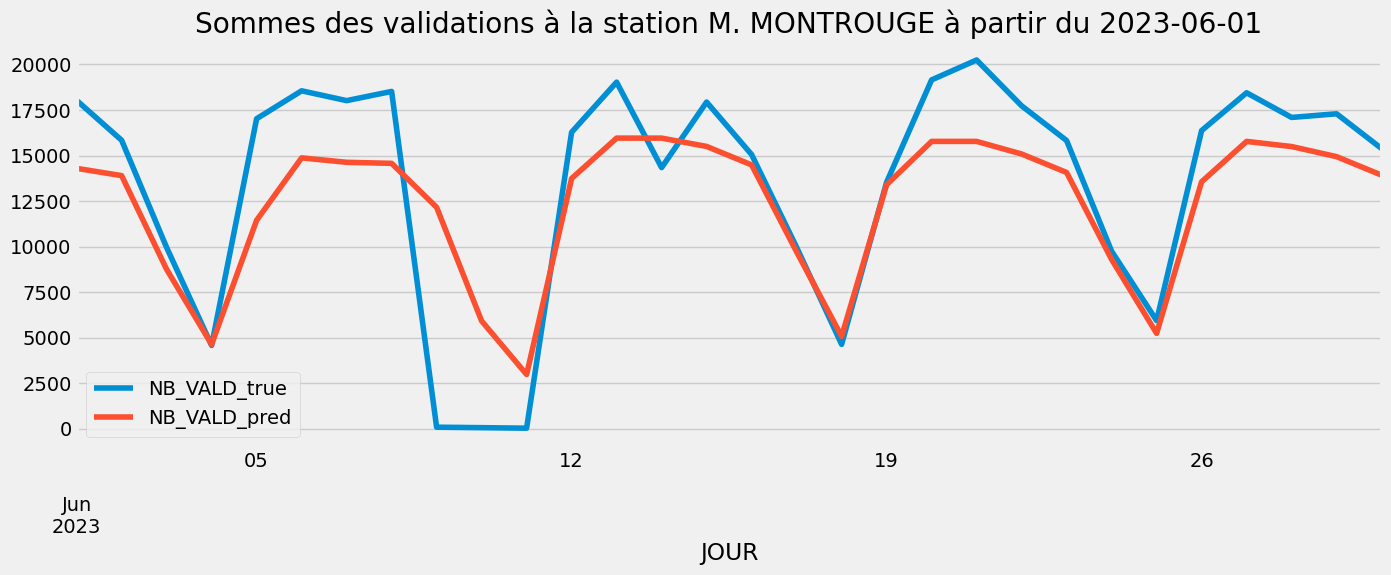

In [69]:
plot_error(station=MONTROUGE)

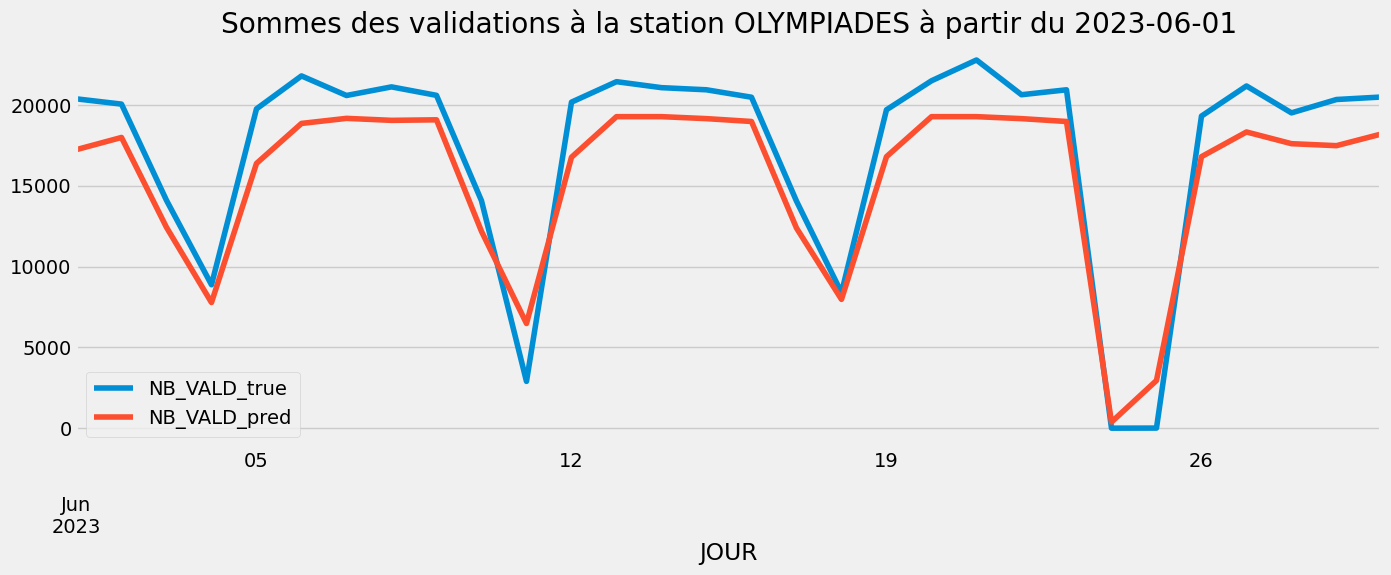

In [70]:

plot_error(station=OLYMPIADES)

# Trouver 10 paires de stations dont les noms sont proches.

##### Pour cette question : on a plusieurs choix en fonction des besoins métier. On peut utiliser la distance de Levenshtein ou alors utiliser une méthode forte de similarité (cosine_similarity) même si cette dernière méthode ne semble pas appropriée puisqu'il s'agit de trouver la similarité entre des mots et non de documents. Néanmoins, cette deuxième méthode donne également des résultats.

##### ** On utilisera la distance de Levenshtein**

In [71]:
import re
import itertools
import Levenshtein

def similarity_levenshtein(names, threshold: float = 0.7):
    num_names = len(names)
    pairs = {}
    for i, j in itertools.combinations(range(num_names), 2):
        levenshtein_ratio = Levenshtein.ratio(names[i].lower(), names[j].lower())
        if levenshtein_ratio > threshold:
            pairs[(names[i], names[j])] = levenshtein_ratio
    df_pairs  = pd.Series(pairs).reset_index()
    df_pairs.columns = ["nom_1", "nom_2", "similarite"]

    return df_pairs.sort_values(by="similarite", ascending=False).reset_index(drop=True)

noms_stations = df_validation.LIBELLE_ARRET.unique()

df_noms_proches_levenshtein = similarity_levenshtein(noms_stations, threshold=0.7)
df_noms_proches_levenshtein.head(10)

,nom_1,nom_2,similarite
0,LIVRY SUR SEINE,IVRY SUR SEINE,0.965517
1,PONT-CARDINET,PONT CARDINET,0.923077
2,VERSAILLES RG,VERSAILLES RD,0.923077
3,AEROPORT CDG2,AEROPORT CDG1,0.923077
4,LOUVRE,LOUVRES,0.923077
5,CHAVILLE RG,CHAVILLE RD,0.909091
6,VIROFLAY RG,VIROFLAY RD,0.909091
7,COIGNIERES,TACOIGNIERES,0.909091
8,BILLANCOURT,BALLANCOURT,0.909091
9,VITRY SUR SEINE,IVRY SUR SEINE,0.896552
